In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F 
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor 
import matplotlib.pyplot as plt 
import numpy as np

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

num_epochs = 20
batch_size = 10
learning_rate = 0.001

In [3]:
training_data = datasets.FashionMNIST(root = "data",train = True , download = True, transform=ToTensor())
test_data = datasets.FashionMNIST(root = "data", train = False, download = True, transform=ToTensor())

100%|██████████| 26.4M/26.4M [00:01<00:00, 15.0MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 273kB/s]
100%|██████████| 4.42M/4.42M [00:00<00:00, 5.07MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 15.2MB/s]


In [4]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size = 64 ,shuffle=True)
test_dataloader = DataLoader(test_data , batch_size = 64 , shuffle=True)

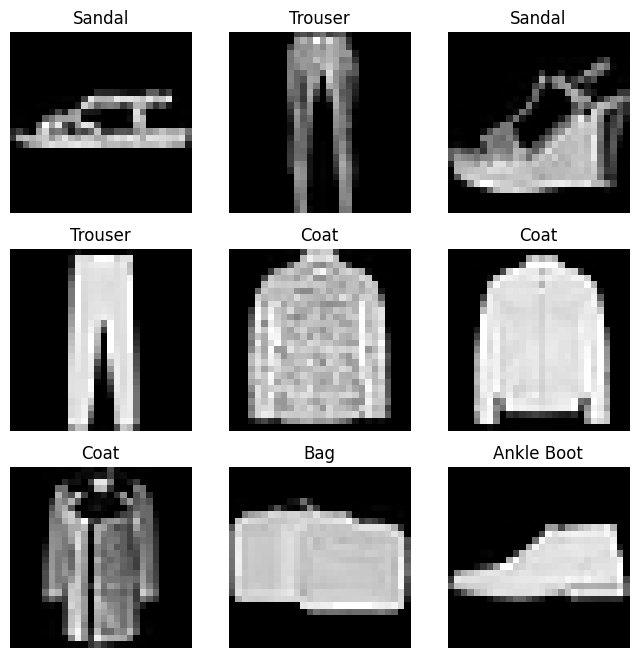

In [5]:
labels_map = {
    0:"T-Shirt",
    1:"Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

figure  = plt.figure(figsize=(8,8))
cols, rows = 3,3
for i in range (1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [6]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork()

In [7]:
loss_fn = nn.CrossEntropyLoss()

In [8]:
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [9]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    # Set the model to training mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * batch_size + len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")


def test_loop(dataloader, model, loss_fn):
    # Set the model to evaluation mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.eval()
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    # Evaluating the model with torch.no_grad() ensures that no gradients are computed during test mode
    # also serves to reduce unnecessary gradient computations and memory usage for tensors with requires_grad=True
    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [10]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.310195  [   64/60000]
loss: 2.277697  [ 1064/60000]
loss: 2.281827  [ 2064/60000]
loss: 2.258247  [ 3064/60000]
loss: 2.241725  [ 4064/60000]
loss: 2.248881  [ 5064/60000]
loss: 2.217790  [ 6064/60000]
loss: 2.209442  [ 7064/60000]
loss: 2.181963  [ 8064/60000]
loss: 2.162295  [ 9064/60000]
Test Error: 
 Accuracy: 38.0%, Avg loss: 2.155242 

Epoch 2
-------------------------------
loss: 2.136367  [   64/60000]
loss: 2.136198  [ 1064/60000]
loss: 2.110152  [ 2064/60000]
loss: 2.055837  [ 3064/60000]
loss: 2.076113  [ 4064/60000]
loss: 2.069281  [ 5064/60000]
loss: 1.983151  [ 6064/60000]
loss: 1.990867  [ 7064/60000]
loss: 1.924253  [ 8064/60000]
loss: 1.868371  [ 9064/60000]
Test Error: 
 Accuracy: 49.5%, Avg loss: 1.895486 

Epoch 3
-------------------------------
loss: 1.872817  [   64/60000]
loss: 1.930222  [ 1064/60000]
loss: 1.803308  [ 2064/60000]
loss: 1.782311  [ 3064/60000]
loss: 1.698563  [ 4064/60000]
loss: 1.654429  [ 5064/600

In [6]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import torchvision.models as models
from torch.utils.data import DataLoader
from torchvision import datasets


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")


pretrained_transforms = transforms.Compose([
    transforms.Resize((224, 224)),               
    transforms.Grayscale(num_output_channels=3),  
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])


training_data = datasets.FashionMNIST(root="data", train=True, download=True, transform=pretrained_transforms)
test_data = datasets.FashionMNIST(root="data", train=False, download=True, transform=pretrained_transforms)

train_loader = DataLoader(training_data, batch_size=32, shuffle=True)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)


model = models.resnet18(weights='DEFAULT')


for param in model.parameters():
    param.requires_grad = False


model.fc = nn.Linear(model.fc.in_features, 10)


model = model.to(device)


optimizer = torch.optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=1e-3)
criterion = nn.CrossEntropyLoss()


print("Starting Training...")
for epoch in range(5):
    model.train()
    total_loss = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

       
        outputs = model(images)
        loss = criterion(outputs, labels)

       
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    print(f"Epoch {epoch+1}/5, Loss: {total_loss/len(train_loader):.4f}")

print("Finished Training!")

Using device: cuda
Starting Training...
Epoch 1/5, Loss: 0.5742
Epoch 2/5, Loss: 0.4343
Epoch 3/5, Loss: 0.4175
Epoch 4/5, Loss: 0.3985
Epoch 5/5, Loss: 0.3933
Finished Training!


In [8]:


model.eval() 
correct = 0
total = 0


with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        
        
        outputs = model(images)
        
        
        _, predicted = torch.max(outputs.data, 1)
        
       
        total += labels.size(0)
        correct += (predicted == labels).sum().item()


accuracy = 100 * correct / total
print(f"Accuracy : {accuracy:.2f}%")

Accuracy : 85.02%
